In [16]:
from Poisson import PoissonModel
from allocation import allocator
from hist_retrieval import hist_retriever
from allocation import allocator
from clustering import clusterer
from itertools import chain
import cPickle as pickle
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [17]:
# Create a Dataframe and drop extra column
df = pd.read_csv('../data/seattle_911_prepped_no_out.csv', low_memory=False)
df.drop(['Unnamed: 0'], axis=1, inplace=True)
# Load pickled Poisson model
with open('PoissonModel.pkl', 'rb') as pkl_object:
    model = pickle.load(pkl_object)   

In [30]:
query = {'date_input': '2016-11-20', 'num_units': 23, 
         'home_game': 'mariners', 'time_range': 0}

In [31]:
preds = model.predict(query)
preds

[('zone1', 19.879161626918705),
 ('zone2', 15.926433896358214),
 ('zone3', 10.645520356589104),
 ('zone4', 18.824449463208914),
 ('zone5', 25.070817033470174),
 ('zone6', 12.996972082692562),
 ('zone7', 18.078276651701092)]

In [32]:
alloc = allocator(query["num_units"], preds)
alloc

{'zone1': 3.0,
 'zone2': 3.0,
 'zone3': 4.0,
 'zone4': 3.0,
 'zone5': 4.0,
 'zone6': 3.0,
 'zone7': 3.0}

In [33]:
# Homegames
mariners, seahawks, sounders = 0,0,0
if query['home_game'] == 'mariners':
    mariners = 1
if query['home_game'] == 'seahawks':
    seahawks = 1
if query['home_game'] == 'sounders':
    sounders = 1

    
df1 = hist_retriever(df, mariners, seahawks, sounders, query['date_input'], 
                         query['time_range'], 'zone1')
df2 = hist_retriever(df, mariners, seahawks, sounders, query['date_input'], 
                         query['time_range'], 'zone2')
df3 = hist_retriever(df, mariners, seahawks, sounders, query['date_input'], 
                         query['time_range'], 'zone3')
df4 =  hist_retriever(df, mariners, seahawks, sounders, query['date_input'], 
                         query['time_range'], 'zone4')
df5 =  hist_retriever(df, mariners, seahawks, sounders, query['date_input'], 
                         query['time_range'], 'zone5')
df6 = hist_retriever(df, mariners, seahawks, sounders, query['date_input'], 
                         query['time_range'], 'zone6')
df7 =  hist_retriever(df, mariners, seahawks, sounders, query['date_input'], 
                         query['time_range'], 'zone7')

In [34]:
# Find centroids with clusterer
centroids1, clusters1 = clusterer(df1, int(alloc['zone1']))
centroids2, clusters2 = clusterer(df2, int(alloc['zone2']))
centroids3, clusters3 = clusterer(df3, int(alloc['zone3']))
centroids4, clusters4 = clusterer(df4, int(alloc['zone4']))
centroids5, clusters5 = clusterer(df5, int(alloc['zone5']))
centroids6, clusters6 = clusterer(df6, int(alloc['zone6']))
centroids7, clusters7 = clusterer(df7, int(alloc['zone7']))

In [35]:
# Combine centroids and create DataFrame of locations
centroids = list(chain(centroids1, centroids2, centroids3, centroids4,
                       centroids5, centroids6, centroids7))
centroid_df = pd.DataFrame(centroids)
centroid_df.columns = ['Latitude', 'Longitude']

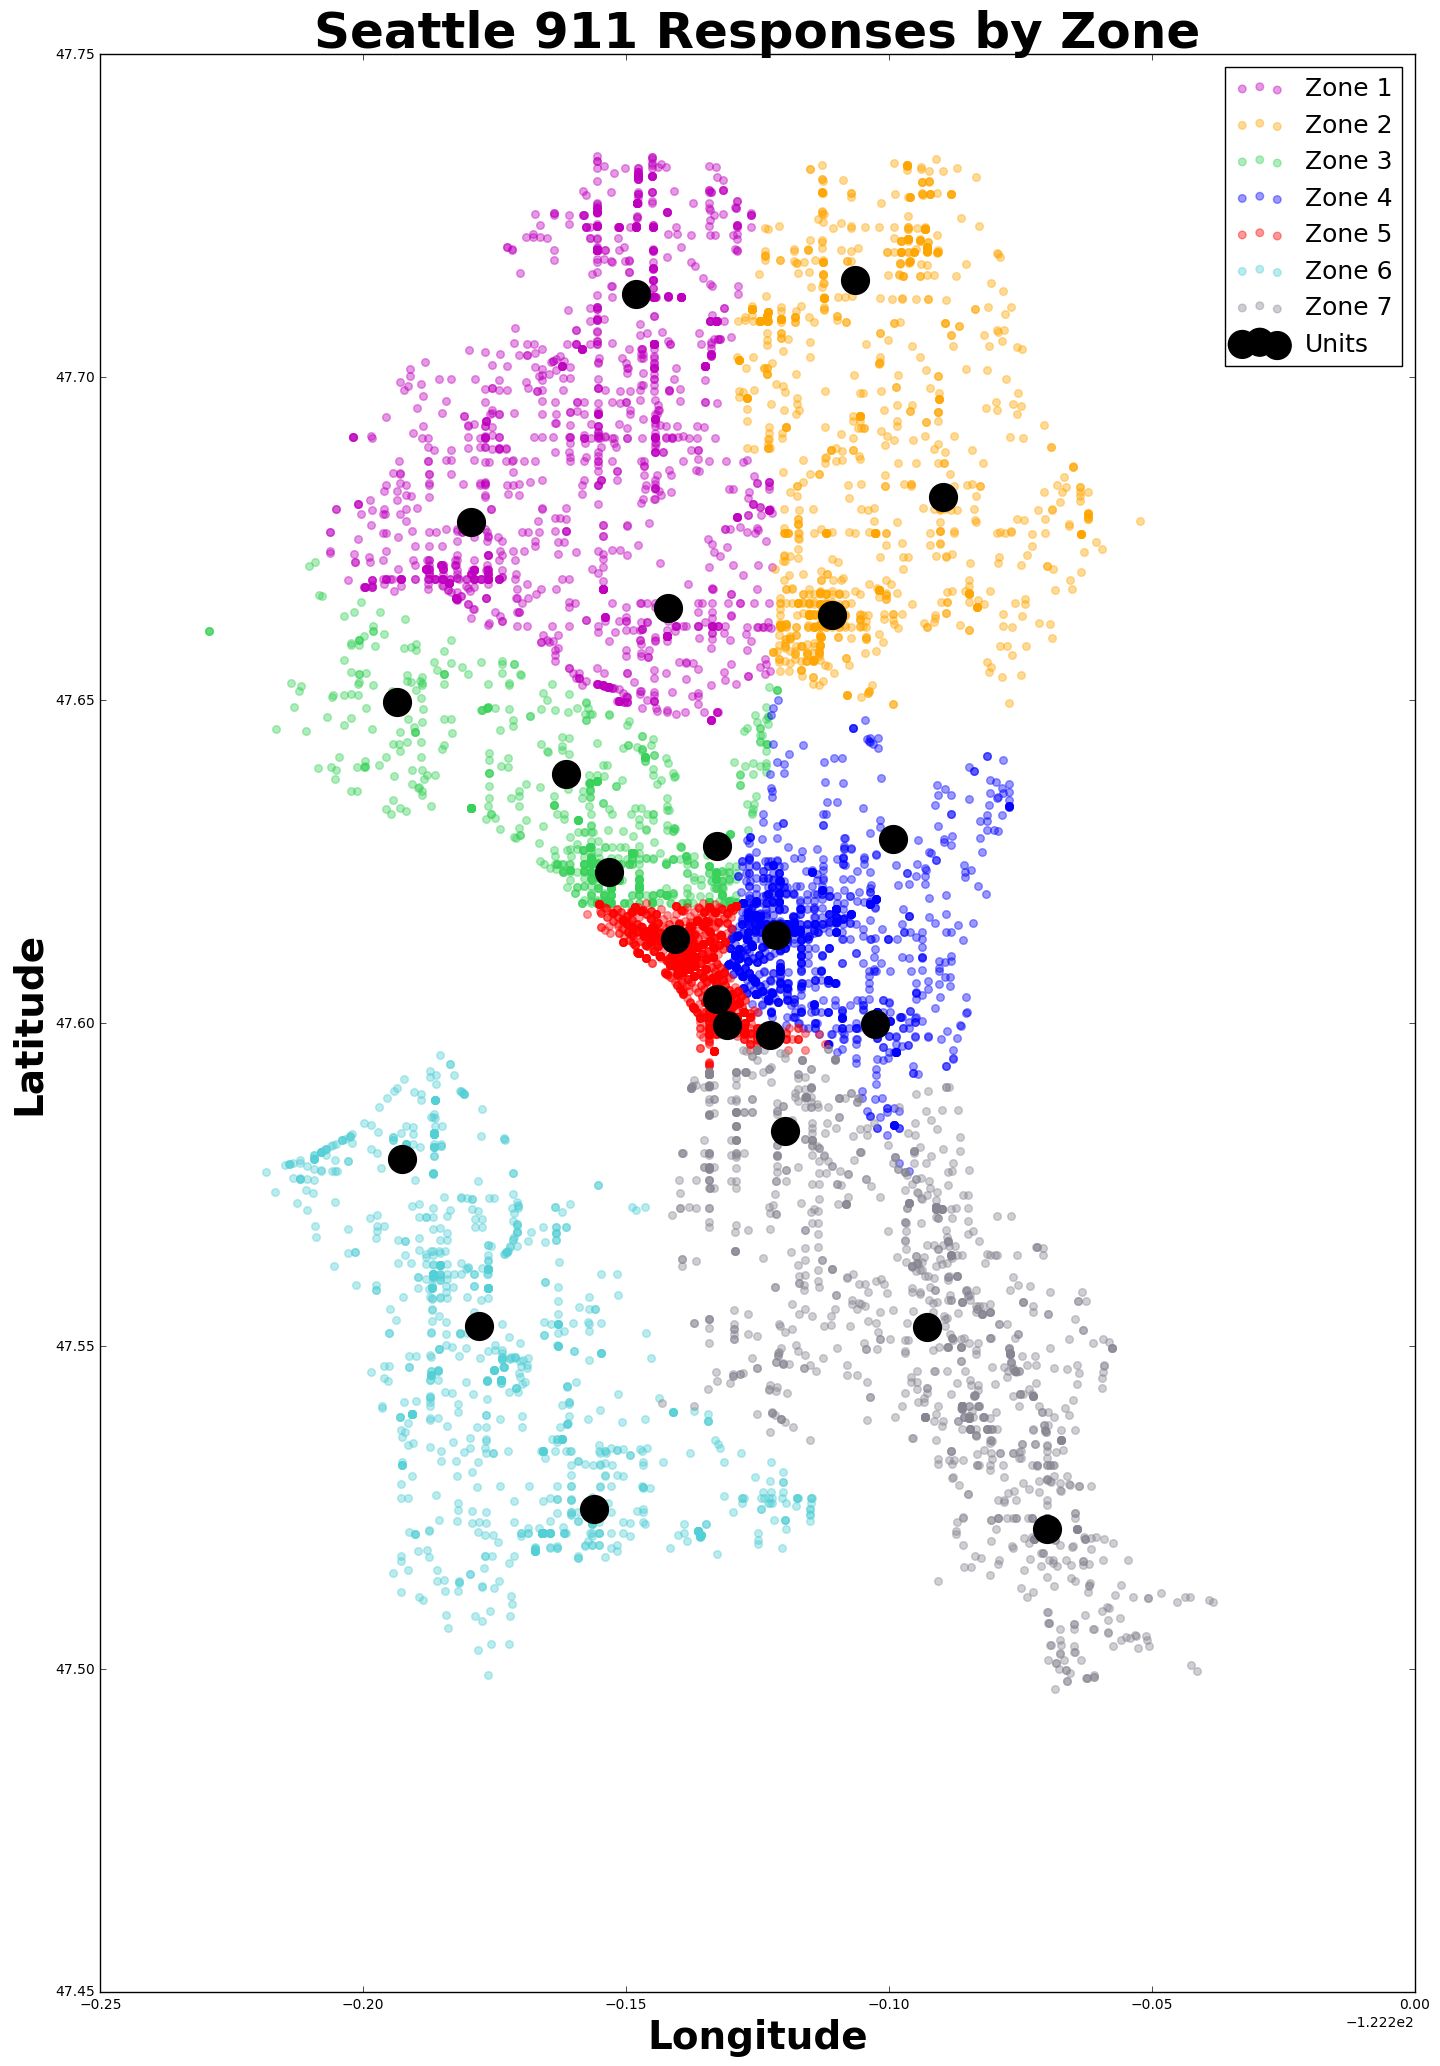

In [36]:
# Create and save a scatter plot (map) of 911 calls by zone
plt.figure(figsize=(16.96,25))
plt.scatter(x=df1.Longitude, y=df1.Latitude, color='m', s=30, alpha=0.4)
plt.scatter(x=df2.Longitude, y=df2.Latitude, color='orange', s=30, alpha=0.4)
plt.scatter(x=df3.Longitude, y=df3.Latitude, color='#38d159', s=30, alpha=0.4)
plt.scatter(x=df4.Longitude, y=df4.Latitude, color='b', s=30, alpha=0.4)
plt.scatter(x=df5.Longitude, y=df5.Latitude, color='r', s=30, alpha=0.4)
plt.scatter(x=df6.Longitude, y=df6.Latitude, color='#53cfd6', s=30, alpha=0.4)
plt.scatter(x=df7.Longitude, y=df7.Latitude, color='#868591', s=30, alpha=0.4)
plt.scatter(centroid_df.Longitude, centroid_df.Latitude, s=400, color='k')
plt.xlabel('Longitude', fontsize=28, fontweight='bold')
plt.ylabel('Latitude', fontsize=28, fontweight='bold')
plt.title('Seattle 911 Responses by Zone', fontsize=36, fontweight='bold')
plt.legend(['Zone 1', 'Zone 2', 'Zone 3', 'Zone 4', 'Zone 5', 'Zone 6', 'Zone 7', 'Units'], fontsize=18)
plt.savefig('../images/seattle_911_pred.png')

In [38]:
centroid_df.index +=1
centroid_df

,Latitude,Longitude
1,47.664287,-122.342112
2,47.712885,-122.348063
3,47.677554,-122.379453
4,47.681385,-122.289771
5,47.663089,-122.310895
6,47.714972,-122.306503
7,47.627292,-122.332743
8,47.638550,-122.361452
9,47.623418,-122.353226
10,47.649706,-122.393674


In [25]:
table = centroid_df.to_html()

In [26]:
table.replace("\n", "")

u'<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>Latitude</th>      <th>Longitude</th>    </tr>  </thead>  <tbody>    <tr>      <th>0</th>      <td>47.677581</td>      <td>-122.379395</td>    </tr>    <tr>      <th>1</th>      <td>47.712920</td>      <td>-122.348056</td>    </tr>    <tr>      <th>2</th>      <td>47.664287</td>      <td>-122.342112</td>    </tr>    <tr>      <th>3</th>      <td>47.681385</td>      <td>-122.289771</td>    </tr>    <tr>      <th>4</th>      <td>47.663089</td>      <td>-122.310895</td>    </tr>    <tr>      <th>5</th>      <td>47.714972</td>      <td>-122.306503</td>    </tr>    <tr>      <th>6</th>      <td>47.623309</td>      <td>-122.347426</td>    </tr>    <tr>      <th>7</th>      <td>47.639690</td>      <td>-122.374744</td>    </tr>    <tr>      <th>8</th>      <td>47.652112</td>      <td>-122.398185</td>    </tr>    <tr>      <th>9</th>      <td>47.640424</td>      <td>-122.342233</td>    </t

In [39]:
centroids
len(centroids)

23